## IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings( "ignore")

## IMPORTING DATASET

In [2]:
data = pd.read_excel('winequality-red-full_.xlsx', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
len(data.keys())

12

## EXPLORATORY DATA ANALYSIS

__Non-null & Data Type.__

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


__Stats.__

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


__Heat Map.__

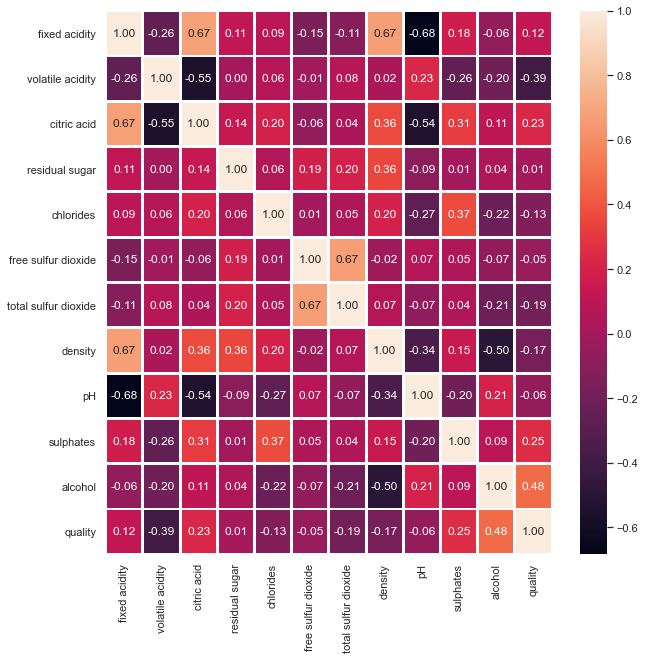

In [7]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidth=2)

<html>
    <table>
  <tr>
    <th></th>
    <th>Red Wine</th>
  </tr>
  <tr>
      <td><b>Quality</b></td>
    <td><b> +ve Correlation :</b><br> - Alcohol<br> - Fixed Acidity<br> - sulphates<br> - Citric Acid<br><br>- <b>-ve Correlation :</b><br> - Volatile Acidity<br> - Total Sulfur dioxide<br><br> - density<br> - chlorides<br></td>

  
</table>
</html>

- acidity (capturing fixed acidity, volatile acidity, citric acid, pH and sulphates), 
- sulphur dioxide (capturing free sulphur dioxide and total sulphur dioxide) 
- alcohol content (capturing density and alcohol).

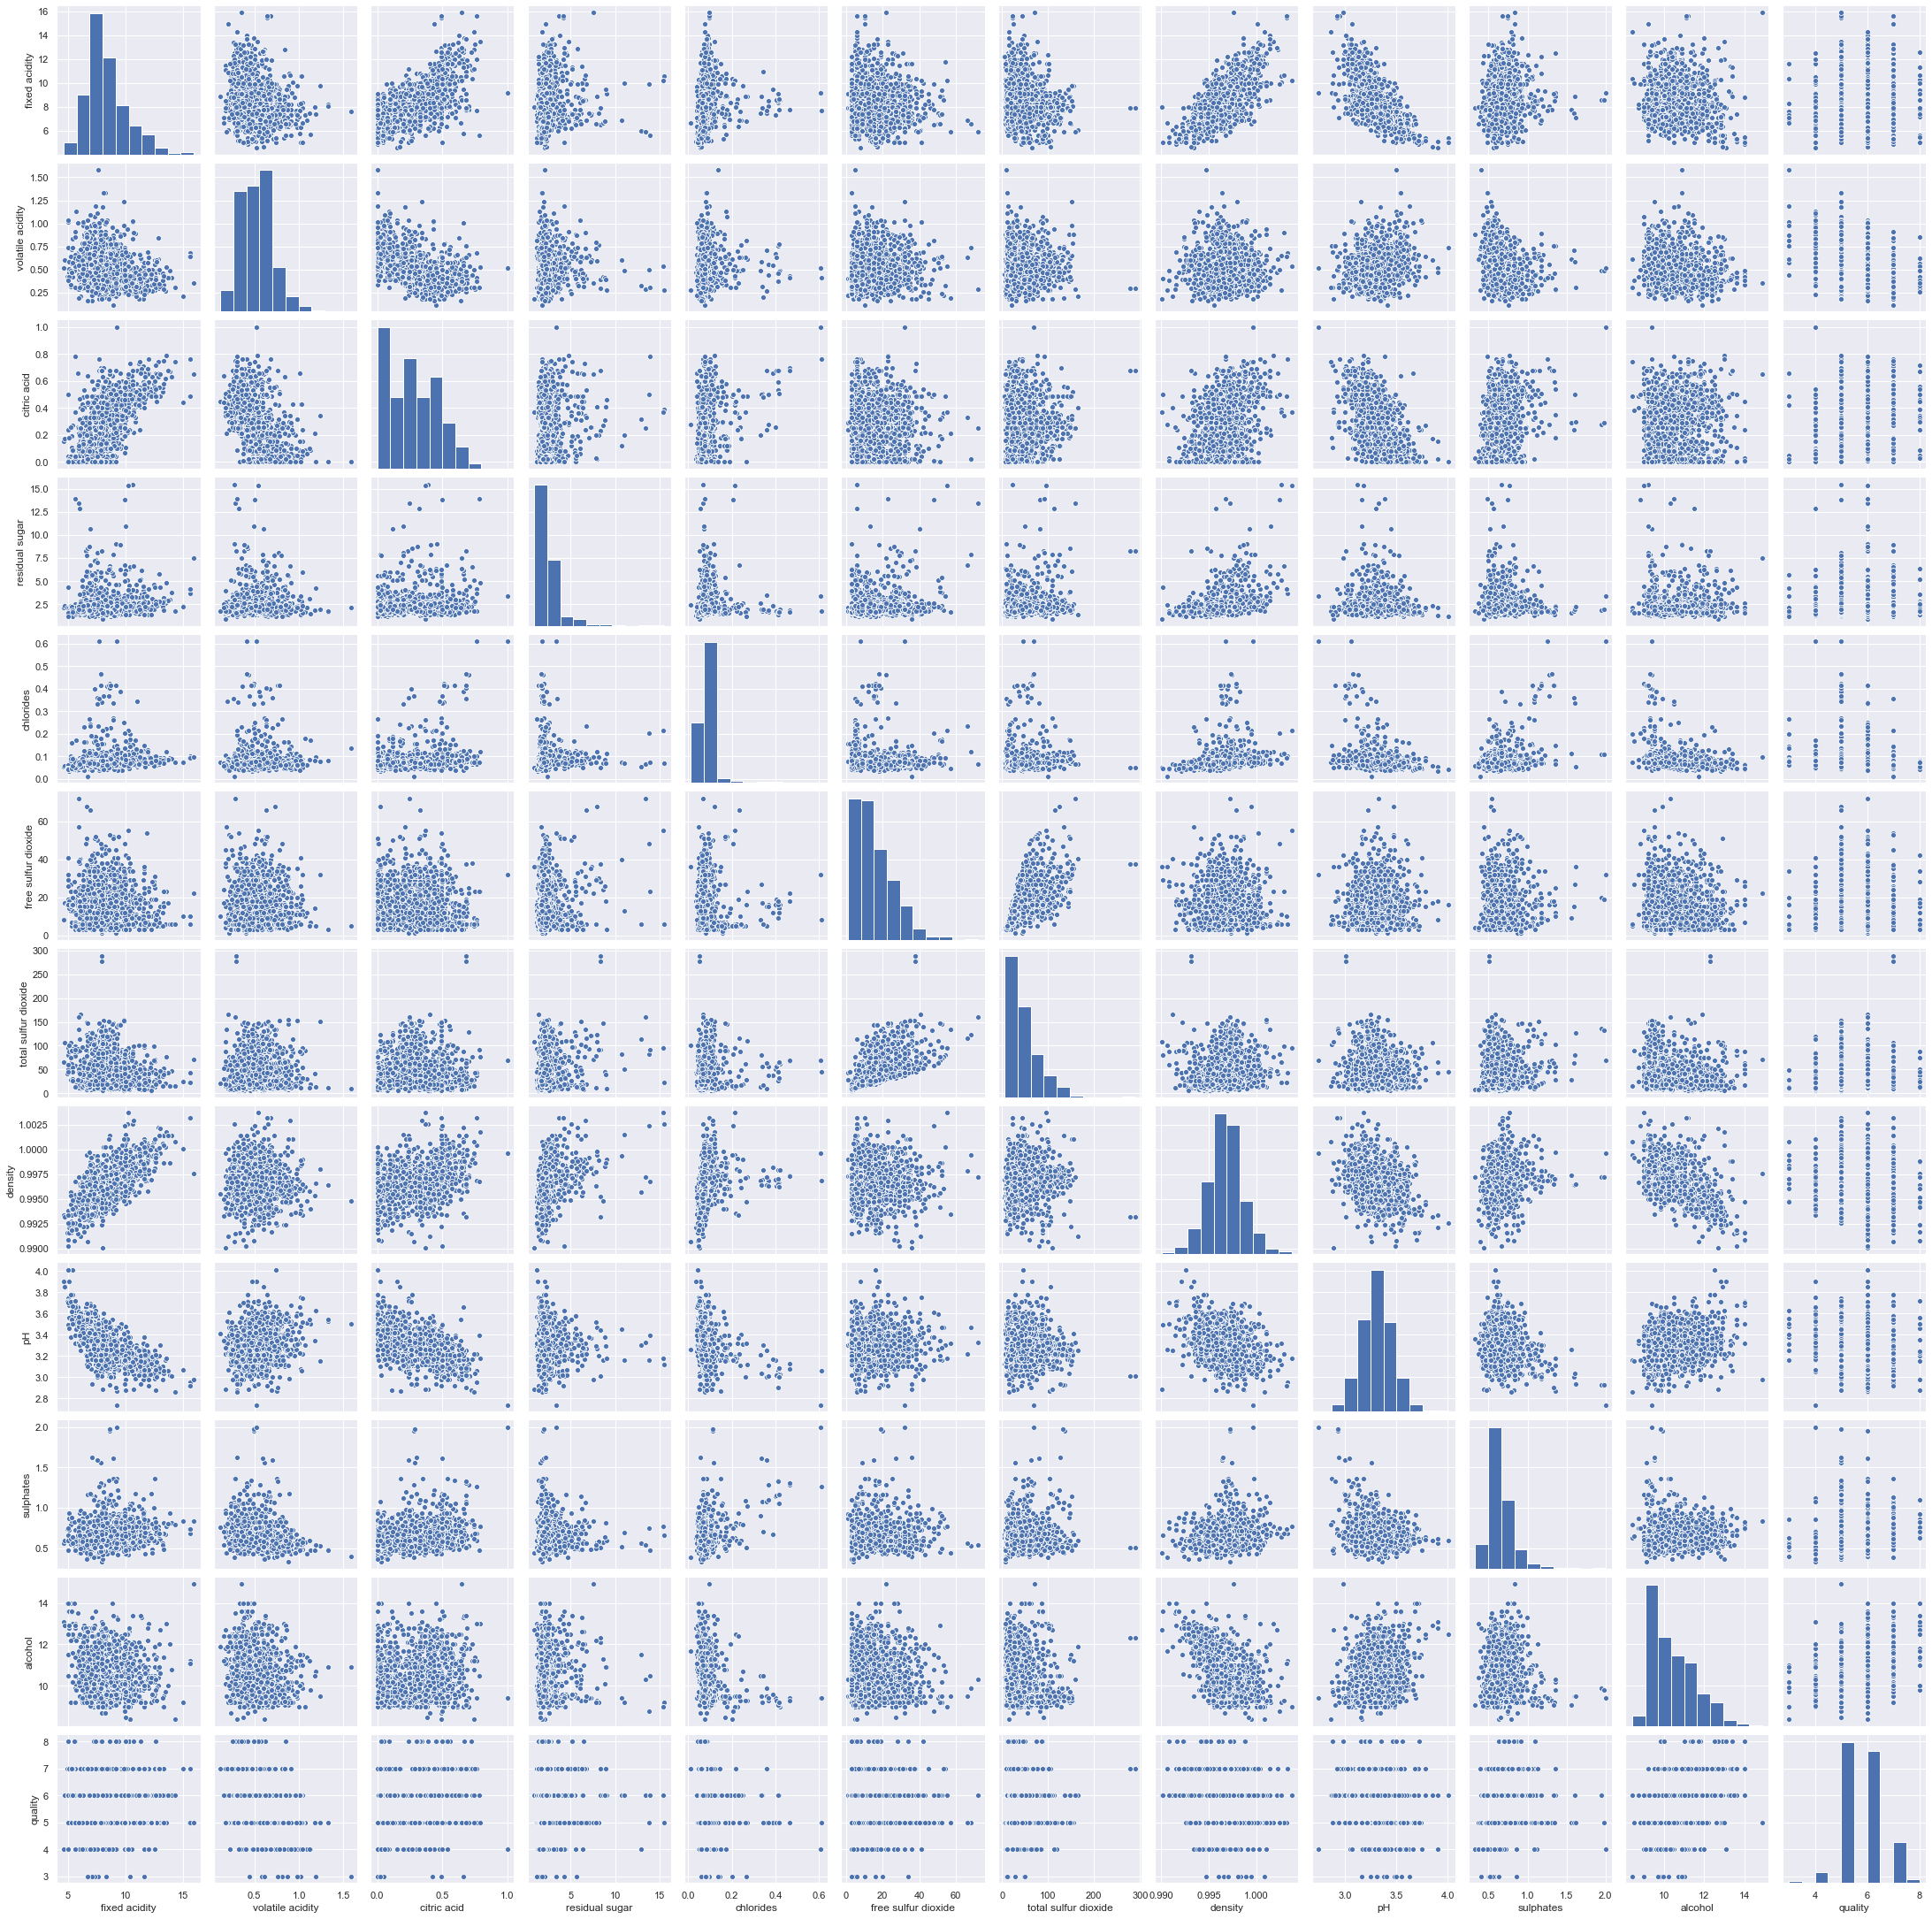

In [8]:
sns.pairplot(data)

## SPLIT DATA

In [9]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [10]:
X_key = X.keys()

 ## DIMENSIONAL REDUCTION

__Sparse PCA.__

In [11]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(alpha=5)
transformer.fit(X)

SparsePCA(alpha=5)

In [12]:
X_transformed = transformer.transform(X)

In [13]:
X_transformed.shape

(1599, 11)

## STANDARD SCALLING

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_transformed)
X_transformed

array([[-12.34434888,   4.82665527,   0.91053195, ...,  -0.26829268,
          0.        ,   0.        ],
       [ 20.32891845,  -9.03473087,   0.51449235, ...,  -0.26829268,
          0.        ,   0.        ],
       [  7.45763132,   0.86625923,   0.51449235, ...,  -0.22868872,
          0.        ,   0.        ],
       ...,
       [ -6.40375482, -12.9951269 ,   1.99964086, ...,  -0.13957981,
          0.        ,   0.        ],
       [ -2.44335878, -15.96542393,   2.39568047, ...,  -0.1494808 ,
          0.        ,   0.        ],
       [ -4.4235568 ,  -2.1040378 ,   2.29667057, ...,   0.19705385,
          0.        ,   0.        ]])

In [15]:
X_reduced=pd.DataFrame(X_transformed)
X_reduced

,0,1,2,3,4,5,6,7,8,9,10
0,-12.344349,4.826655,0.910532,0.632481,-1.012855,-0.170475,-0.097177,0.196918,-0.268293,0.0,0.0
1,20.328918,-9.034731,0.514492,-0.060589,-0.616815,-0.348693,0.021635,-0.110013,-0.268293,0.0,0.0
2,7.457631,0.866259,0.514492,0.236441,-0.616815,-0.229881,-0.008068,-0.050607,-0.228689,0.0,0.0
3,13.398225,-1.113939,-2.851844,0.632481,-0.616815,0.245367,-0.077375,-0.149617,0.286163,0.0,0.0
4,-12.344349,4.826655,0.910532,0.632481,-1.012855,-0.170475,-0.097177,0.196918,-0.268293,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.443359,-15.965424,2.098651,0.533471,0.076254,-0.071465,-0.077375,0.137512,-0.189085,0.0,0.0
1595,4.487334,-22.896117,2.395680,0.335451,0.769324,-0.021960,0.100843,0.206819,-0.169283,0.0,0.0
1596,-6.403755,-12.995127,1.999641,0.236441,0.571304,0.017644,0.090942,0.107809,-0.139580,0.0,0.0
1597,-2.443359,-15.965424,2.395680,0.533471,-0.220775,-0.116019,0.051338,0.256324,-0.149481,0.0,0.0


## PRE - REDUCED FILE

In [16]:
reduced = pd.read_excel('winequality-red-reduced_.xlsx')
reduced

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
reduced.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [18]:
scaler = StandardScaler()
red_X = scaler.fit_transform(reduced)
red_X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [19]:
fir_red=pd.DataFrame(red_X)
fir_red

,0,1,2,3,4,5,6,7,8
0,-0.528360,0.961877,-1.391472,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308
